In [1]:
#Se importan las librerias
import pandas as pd
import seaborn as sns#visualizacion
import plotly.offline as py#visualizacion
py.init_notebook_mode(connected=True)#visualizacion
import plotly.graph_objs as go#visualizacion
import plotly.tools as tls#visualizacion
import plotly.figure_factory as ff#visualizacion
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Se carga el DataFrame
df = pd.read_csv('clientes.csv')

In [3]:
# Se muestra el encabezado del DF
df.head()

id  identificacion   nombre  score    zona    sexo  edad  tiempo  \
0   6        15574012      Chu    645  Centro  Hombre    44       8   
1  12        15737173  Andrews    497  Centro  Hombre    24       3   
2  19        15661507  Muldrow    587  Centro  Hombre    45       6   
3  37        15788448   Watson    490  Centro  Hombre    31       3   
4  38        15729599  Lorenzo    804  Centro  Hombre    33       7   

   patrimonio  cantproduc  creditoactivo  estadoasoc    salario  retirado  
0    11375578           2              1           0  149756.70         1  
1           0           2              1           0   76390.01         0  
2           0           1              0           0  158684.81         0  
3    14526023           1              0           1  114066.77         0  
4      765486           1              0           1   98453.45         0

In [4]:
# se muestra la cola del DF
df.tail()

id  identificacion     nombre  score   zona    sexo  edad  tiempo  \
9995  9989        15589329    Pirozzi    775    Sur  Hombre    30       4   
9996  9994        15569266     Rahman    644    Sur  Hombre    28       7   
9997  9996        15606229   Obijiaku    771    Sur  Hombre    39       5   
9998  9997        15569892  Johnstone    516    Sur  Hombre    35      10   
9999   409        15701376      K'ung    668  Norte  Hombre    37      10   

      patrimonio  cantproduc  creditoactivo  estadoasoc    salario  retirado  
9995           0           2              1           0   49337.84         0  
9996    15506041           1              1           0   29179.52         0  
9997           0           2              1           0   96270.64         0  
9998     5736961           1              1           1  101699.77         0  
9999    15295829           2              1           1  159585.61         0

In [5]:
df.shape

(10000, 14)

In [6]:
#Se muestra la descripción del DF
df.describe()

id  identificacion         score          edad        tiempo  \
count  10000.00000    1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000    1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568    7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000    1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000    1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000    1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000    1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000    1.581569e+07    850.000000     92.000000     10.000000   

         patrimonio    cantproduc  creditoactivo    estadoasoc        salario  \
count  1.000000e+04  10000.000000    10000.00000  10000.000000   10000.000000   
mean   6.980471e+06      1.530200        0.70550      0.515100  100090.239859   
std    6.285896e+06      0.581654        0.45584      0.499797   57510.492795   
min    0.000000e+00      1.000000        0.00000      0.000000      11.580000   
25%    0.000000e+00      1.000000        0.00000      0.000000   51002.110000   
50%    8.668510e+06      1.000000        1.00000      1.000000  100193.915000   
75%    1.246215e+07      2.000000        1.00000      1.000000  149388.255000   
max    2.508981e+07      4.000000        1.00000      1.000000  199992.480000   

           retirado  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
# Se muestra la información del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   identificacion  10000 non-null  int64  
 2   nombre          10000 non-null  object 
 3   score           10000 non-null  int64  
 4   zona            10000 non-null  object 
 5   sexo            10000 non-null  object 
 6   edad            10000 non-null  int64  
 7   tiempo          10000 non-null  int64  
 8   patrimonio      10000 non-null  int64  
 9   cantproduc      10000 non-null  int64  
 10  creditoactivo   10000 non-null  int64  
 11  estadoasoc      10000 non-null  int64  
 12  salario         10000 non-null  float64
 13  retirado        10000 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.1+ MB


##### Para el análisis de los datos de este trabajo aplicado, se toma un conjunto de datos de clientes de una entidad financiera.  
##### Los datos son anónimos y son datos públicos, se descargaron de la plataforma Kaggle y se puede ver que la estructura de los datos es la siguiente: 14 columnas y 10000 filas. 

##### En estos datos se pueden encontrar clientes de ambos sexos (Hombre y Mujer), en un rango de edad desde los 18, hasta los 82 años, que manejan un score crediticio desde 350 hasta 850, y con un tiempo de vinculación entre 0 y 10 años.


# Se inicia el Análisis de los datos

In [8]:
# Se importa otra libreria para graficos avanzados 
# se crean las variables de
mpl.style.use('ggplot')
retirado     = df[df["retirado"] == 1]
no_retirado = df[df["retirado"] == 0]

##### En el conjunto de datos, ya se han identificado los asociados retirados y no retirados de los ultimos dos años. 
##### Usando estas variables se puede evidenciar en un gráfico circular como se presentan los retiros de los asociados.

In [9]:
# se transforman los valores, para que en la gráfica se muestren Si y No, en lugar de 1 y 0
lab = ["No", "SI"]
#values
val = df["retirado"].value_counts().values.tolist()

In [10]:
val



[7963, 2037]

In [11]:
# En esta grafica se puede ver la distribución de los clientes segun su estado de asociatividad
trace = go.Pie(labels = lab ,
               values = val ,
               name="Retirado",
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Distribución de los clientes según su estado",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

# Se inicia la visualización de las gráficas de pastel

In [12]:
# se imprime el gráfico
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

##### Se utilizan gráficos circulares, para visualizar el comportamiento de las variables categoricas, respecto a la variable de retiro

In [13]:
#Funcion para crear los graficos de pastel por tipos de deserción de clientes con variables cualitativas
def plot_pie(column) :
    
    trace1 = go.Pie(values  = retirado[column].value_counts().values.tolist(),
                    labels  = retirado[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Retirado",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = no_retirado[column].value_counts().values.tolist(),
                    labels  = no_retirado[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "No Retirado" 
                   )
 
 
    layout = go.Layout(dict(title = "Distribución de la deserción de los asociados según el " +column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Retirado",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "No Retirado",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace2,trace1]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

cat_cols = ["zona", "sexo"]

for i in cat_cols :
    plot_pie(i)
    

In [14]:
cat_cols = ["cantproduc", "creditoactivo", "estadoasoc"]

for i in cat_cols :
    plot_pie(i)
    

# Análisis de gráficas de Pastel

En las gráficas anteriores, se puede evidenciar que la Zona Norte, es la más vulnerable a los retiros y que la zona Sur es la zona con más variabilidad, teniendo en cuenta que es la zona principal. 

Para el caso de la cantidad de productos, se puede analizar, que los asociados que tiene productos con el Fondo, no se retiran de la misma forma que los asociados que sólo se vinculan solo por los beneficios que brinda el fondo.

La variable de crédito activo no es determinante en el momento de definir los retiros de los asociados.

Las gráficas de deserción por sexo se observa que la distribución es casi uniforme, por lo tanto el sexo no define la vulnerabilidad en los retiros.

Con el estado del asociado se concluye que no define la probabilidad de retiro, el hecho de que el asociado se haya retirado anteriormente.


##### Se utilizan gráficos de barras, para visualizar el comportamiento de las variables cuantitativas, respecto a la variable de retiro

In [15]:
#Funcion para crear el histograma por tipos de deserción de clientes con variables cuantitativas
def histogram(column) :
    trace1 = go.Histogram(x  = retirado[column],
                          histnorm= "percent",
                          name = "Retirado",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = no_retirado[column],
                          histnorm = "percent",
                          name = "No Retirado",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace2,trace1]
    layout = go.Layout(dict(title ="Distribucion de la deserción de los asociados por  " + column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#for all categorical columns plot histogram   
num_cols = ["edad", "patrimonio"]
for i in num_cols :
    histogram(i)

In [16]:
num_cols = ["salario", "score", "tiempo"]
for i in num_cols :
    histogram(i)

# Análisis Gráficos de Barra

En estos gráficos se puede concluir que los asociados a mayor edad son más los asociados que se retiren del Fondo, teniendo la para los retirados una edad promedio de 45 años y 35 para los no retirados.

La variable de score no es determinante para la predicción de los retiros, pues el comportamiento es uniforme.

Los asociados que no tienen patrimonio son los que permanecen vinculados en el fondo, lo cual representa que las personas con mejor solvencia son más vulnerables a retirarse.

El Salario y el tiempo no son variables que definan una vulnerabilidad en los retiros.

# Se realizan gráficos de disperción para mostrar la diferencia entre dos variables, como se relacionan entre sí y determinar su dependencia.

In [17]:
#función para matriz de diagrama de dispersión para columnas de datos numéricas
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "retirado" ,ascending = False)
    classes = df["retirado"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code
 
    color_vals = [class_code[cl] for cl in df["retirado"]]
    color_vals
 
    pl_colorscale = "Portland"
 
    pl_colorscale
 
    text = [df.loc[k,"retirado"] for k in range(len(df))]
    text
 
    trace = go.Splom(dimensions = [dict(label  = "tiempo",
                                       values = df["tiempo"]),
                                  dict(label  = 'patrimonio',
                                       values = df['patrimonio']),
                                  dict(label  = 'salario',
                                       values = df['salario'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Matriz de gráficos de dispersión para columnas numéricas",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)


scatter_matrix(df)


##### Con estas gráficas se puede concluir que entre las variables cuantitativas no existe relación

# Se realiza una matriz de correlación con todas las columnas del data frame para observar la correlación entre ellas y su comportamiento a partir de una métrica.

In [18]:
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
 
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )
 
layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )
 
data = [trace]
fig = go.Figure(data=data,layout=layout)

py.iplot(fig)

# Resumen Matriz Correlación

En esta matriz se pudo observar que las variables de patrimonio y edad tienen una relación positiva, al igual que las variables edad vs retirado, y patrimonio vs retirado.


# Se reduce la dimensionalidad con PCA
Analizando el resultado de los análisis anteriores, se llega a la conclusión de que las variables (Id, Identificacion y nombre), se excluyen ya que no aportan valor a la hora de resolver el problema, por ser de identificación.

Excluyendo tambien la variable retirado, que es la variable a predecir. Realizando esta acción quedan 9 variables, por lo tanto, utilizando PCA (Análisis de Componentes Principales) se reduce la dimensionalidad y se puede visualizar mejor.

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

In [20]:
# Se convierten el tipo de variable zona en valores enteros
df['zona'].replace(['Sur','Centro','Norte'],[0,1,2],inplace=True)

In [21]:
# Se convierten el tipo de variable sexo en valores enteros
df['sexo'].replace(['Mujer','Hombre'],[0,1],inplace=True)

In [22]:
# Se vuelve a mostrar la info de las variables, para observar los cambios anteriores
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   identificacion  10000 non-null  int64  
 2   nombre          10000 non-null  object 
 3   score           10000 non-null  int64  
 4   zona            10000 non-null  int64  
 5   sexo            10000 non-null  int64  
 6   edad            10000 non-null  int64  
 7   tiempo          10000 non-null  int64  
 8   patrimonio      10000 non-null  int64  
 9   cantproduc      10000 non-null  int64  
 10  creditoactivo   10000 non-null  int64  
 11  estadoasoc      10000 non-null  int64  
 12  salario         10000 non-null  float64
 13  retirado        10000 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 1.1+ MB


In [23]:
# Se declaran las variables para los datos sin procesar y datos escalados
pca = PCA(n_components = 2)
Id_col = ['id', 'identificacion', 'nombre']
target_col = ["retirado"]
X = df[[i for i in df.columns if i not in Id_col + target_col]]
Xscal = scale(X)
Y = df[target_col + Id_col]

In [24]:
# Se crean las gráficas
def plot(X,Y, title):
 
    principal_components = pca.fit_transform(X)
    pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
    pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
    pca_data["Retirado"] = pca_data["retirado"].replace({1:"Retirado",0:"No Retirado"})
 
    
    def pca_scatter(target,color) :
        tracer = go.Scatter(x = pca_data[pca_data["Retirado"] == target]["PC1"] ,
                            y = pca_data[pca_data["Retirado"] == target]["PC2"],
                            name = target,mode = "markers",
                            marker = dict(color = color,
                                          line = dict(width = .5),
                                          symbol =  "diamond-open"),
                            text = ("Customer Id : " + 
                                    pca_data[pca_data["Retirado"] == target]['nombre'])
                           )
        return tracer
 
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "componente principal 1",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "componente principal 2",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    trace1 = pca_scatter("Retirado",'red')
    trace2 = pca_scatter("No Retirado",'royalblue')
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)
 


In [25]:
plot(X,Y, "Visualización de datos con análisis de componentes principales en datos sin procesar")

In [26]:
plot(Xscal,Y, "Visualización de datos con análisis de componentes principales en datos escalados")

# Análisis de las gráficas

Con estas gráficas podemos visualizar que no hay separación lineal evidente entre los asociados retirados y no retirados.

In [27]:
### Se utiliza la librería XGBoost para visualizar las variables importantes para el modelo

from xgboost import XGBClassifier
from xgboost import plot_importance

# Se entrenan los modelos con base en el análisis anterior

In [28]:
# se declaran las variables de entrenamiento, se dividen los datos en 80% para entrenar y 20% para test
X = df[['identificacion','score', 'zona', 'sexo', 'edad', 'tiempo', 'patrimonio', 'cantproduc', 'creditoactivo','estadoasoc']]
y = df["retirado"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   identificacion  2000 non-null   int64
 1   score           2000 non-null   int64
 2   zona            2000 non-null   int64
 3   sexo            2000 non-null   int64
 4   edad            2000 non-null   int64
 5   tiempo          2000 non-null   int64
 6   patrimonio      2000 non-null   int64
 7   cantproduc      2000 non-null   int64
 8   creditoactivo   2000 non-null   int64
 9   estadoasoc      2000 non-null   int64
dtypes: int64(10)
memory usage: 171.9 KB


In [30]:
model = XGBClassifier()
model.fit(X_train,Y_train)

[07:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nataly\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

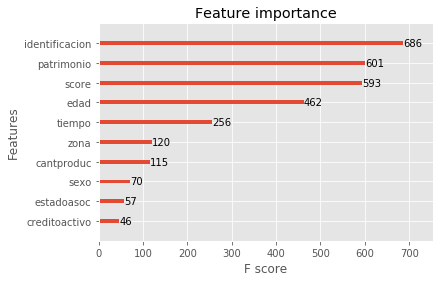

In [31]:
# Se imprimen las variables relevantes para predecir el retiro
plot_importance(model)

# XGBoost

En la gráfica se destacan las variables Patrimonio, Score y edad, como determinantes para la predicción.

In [32]:
# Support Vector Machines SVM

svc = SVC(9)
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)

0.79775

In [33]:
# K Neighbors

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train)

knn.score(X_train, Y_train)

0.8025

In [34]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)

0.892375

Después de entrenar los modelos de SVC, K Neighbors y DecisionTreeClassifier, y cambiar las metricas, se puede notar que el de  DecisionTreeClassifier es el de mayor precisión para el problema planteado.

# Resultado

In [35]:
#Se utiliza el DecisionTreeClassifier para la prediccion de el problema
y_pred = dt.predict(X_test)

print(accuracy_score(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))


0.8455
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1581
           1       0.71      0.44      0.54       419

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.72      2000
weighted avg       0.83      0.85      0.83      2000



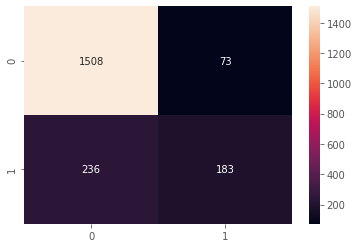

In [36]:
#Matrix de confusion  en un mapa de calor 
sns.heatmap(cm,annot=True,fmt="d")

In [37]:
id = X_test['identificacion']

In [38]:
#se organiza para mostrar una tabla con la identificacion y prediccion 
out_dt=pd.DataFrame({'identificacion':id, 'retirado':y_pred})
out_dt

identificacion  retirado
6252        15600700         1
4684        15779915         0
1731        15764174         0
4742        15768449         1
4521        15708534         1
...              ...       ...
6412        15686718         0
8285        15585777         0
7853        15733777         0
1095        15673908         0
6929        15686917         0

[2000 rows x 2 columns]

In [39]:
#se crea una columna llamada probabilidad
out_dt["probabilidad"] = np.nan

In [40]:
#a probabilidad le asignamos los valores que nos arroja la funcion predict_proba
probabilidad = dt.predict_proba(X_test)

In [41]:
#se agrega probabilidad a la tabla 
out_dt['probabilidad'] = (probabilidad[:,1]) 

In [42]:
#se filtran solo por los retirados
retirados = out_dt.loc[out_dt['retirado'] == 1]

In [43]:
#se exporta la tabla retirados en un csv 
retirados.to_csv('tabla.csv')